In [32]:
#### Titanic datasets

In [33]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

In [34]:
titanic_train = pd.read_csv('datasets/train.csv')
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
#we can drop Name column
titanic_train.drop(columns='Name', inplace= True)

In [36]:
# drop Ticket column
titanic_train.drop(columns='Ticket', inplace= True)

In [37]:
# drop PassengerID
titanic_train.drop(columns='PassengerId', inplace=True)

In [38]:
titanic_train['Cabin'].isna().sum()

687

In [39]:
titanic_train.drop(columns='Cabin', inplace=True)

In [40]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


#### Handling categorical data

In [41]:
# get the columns that are numeric
numeric_cols = [col for col in titanic_train.columns if titanic_train[col].dtype != 'object']
categorical_cols = [col for col in titanic_train.columns if titanic_train[col].dtype == 'object']
print(f'Numerical cols are: {numeric_cols}')
print(f'Categorical cols are: {categorical_cols}')

Numerical cols are: ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical cols are: ['Sex', 'Embarked']


In [42]:
# handling Sex column
titanic_train['Sex'].replace(['male', 'female'], [1, 0], inplace=True )

In [43]:
titanic_train_dummies = pd.get_dummies(titanic_train['Embarked']).astype('int')

In [44]:
titanic_train = pd.concat([titanic_train, titanic_train_dummies], axis=1)

In [45]:
titanic_train.drop(columns='Embarked', inplace=True)

In [46]:
titanic_train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
C             0
Q             0
S             0
dtype: int64

In [47]:
titanic_train.shape

(891, 10)

In [48]:
titanic_train.dropna(inplace=True)

In [49]:
titanic_train.shape

(714, 10)

In [50]:
titanic_train[titanic_train.isnull().any(axis=1)].count()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
C           0
Q           0
S           0
dtype: int64

##### Visualizing relationships in the data

Text(0, 0.5, 'Survived')

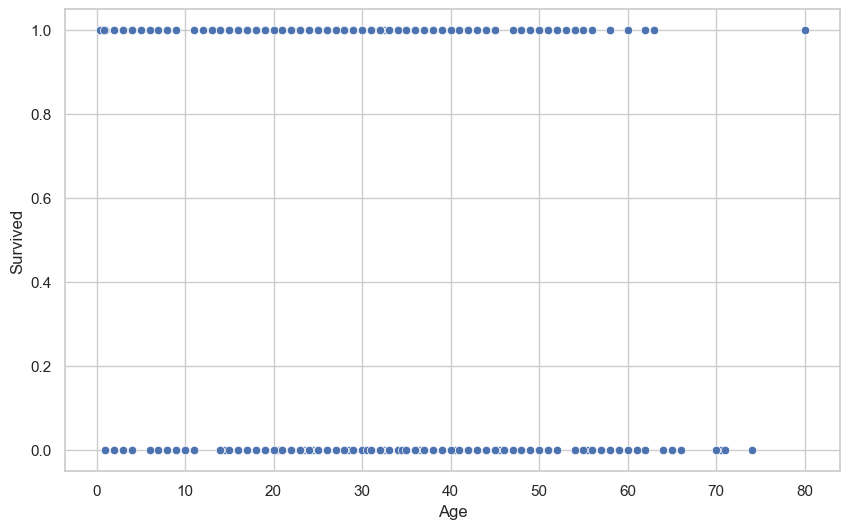

In [51]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.scatterplot(data=titanic_train, x='Age', y='Survived')

plt.xlabel('Age')
plt.ylabel('Survived')

* We can not say if the age had any effects on survival.

Text(0, 0.5, 'Survived')

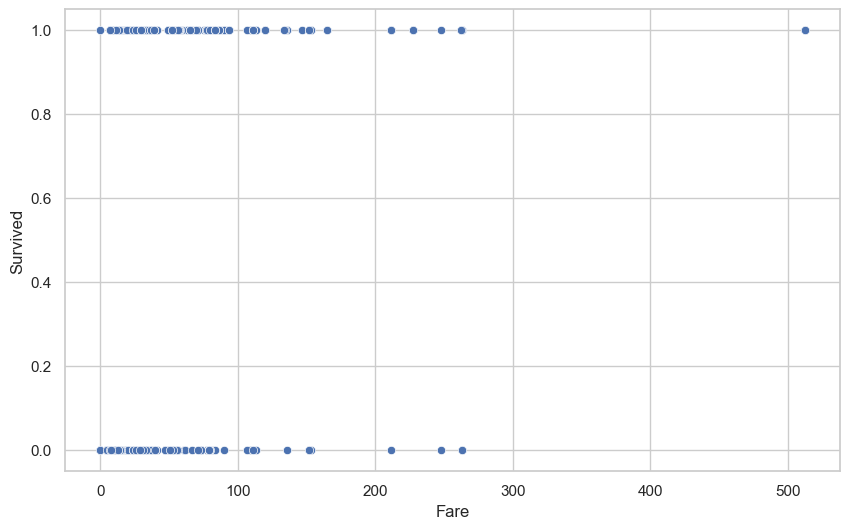

In [52]:
## try relation with fare and survival

fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=titanic_train, x='Fare', y='Survived')

plt.xlabel('Fare')
plt.ylabel('Survived')

* we can see that their are few outliers with expensive fare and survived. Other than that there is not much we can learn from these scatterplots.

In [53]:
pd.crosstab(titanic_train['Sex'], titanic_train['Survived'])

Survived,0,1
Sex,,
0,64,197
1,360,93


* The survival rate is high compared to death for female.
* The survival rate is very low for men wrt death.

In [54]:
pd.crosstab(titanic_train['Pclass'], titanic_train['Survived'] )

Survived,0,1
Pclass,,
1,64,122
2,90,83
3,270,85


* we can see that passenger class has some relationship with the survival rate.

In [55]:
titanic_train_corr = titanic_train.corr()

titanic_train_corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
Survived,1.000000,-0.359653,-0.538826,-0.077221,-0.017358,0.093317,0.268189,0.193607,-0.049549,-0.164235
Pclass,-0.359653,1.000000,0.155460,-0.369226,0.067247,0.025683,-0.554182,-0.276294,0.132415,0.203980
Sex,-0.538826,0.155460,1.000000,0.093254,-0.103950,-0.246972,-0.184994,-0.101580,-0.026440,0.115167
Age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.036261,-0.022405,-0.032523
SibSp,-0.017358,0.067247,-0.103950,-0.308247,1.000000,0.383820,0.138329,-0.045462,0.051619,0.021751
Parch,0.093317,0.025683,-0.246972,-0.189119,0.383820,1.000000,0.205119,-0.008846,-0.009126,0.015833
Fare,0.268189,-0.554182,-0.184994,0.096067,0.138329,0.205119,1.000000,0.299797,-0.062765,-0.253991
C,0.193607,-0.276294,-0.101580,0.036261,-0.045462,-0.008846,0.299797,1.000000,-0.095320,-0.877931
Q,-0.049549,0.132415,-0.026440,-0.022405,0.051619,-0.009126,-0.062765,-0.095320,1.000000,-0.375934
S,-0.164235,0.203980,0.115167,-0.032523,0.021751,0.015833,-0.253991,-0.877931,-0.375934,1.000000


* Positive correlation, the variables move in the same direction
* negative correlation, the variables move in opposite direction
* with survival to fare - as the fare goes up the survival goes up since it is +ve corr.
* with survival to Pclass - in Pclass, we have 3, 2, 1 and 3 is considered to have highest value. and hence -ve corr, that is as the value goes up, survival rate goes down. we need to understand that the value going up means class coming down.

<Axes: >

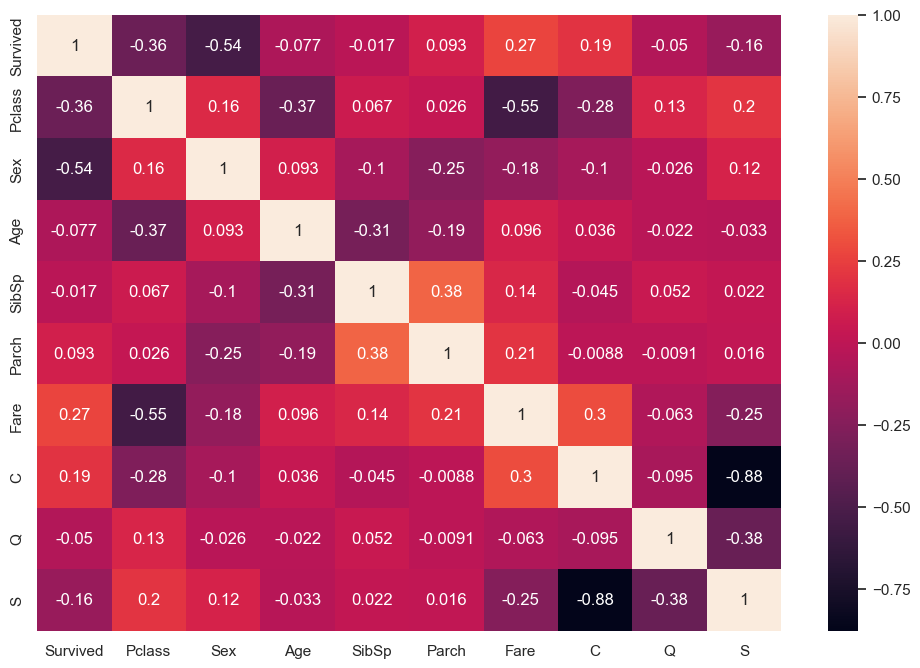

In [56]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(titanic_train_corr, annot=True)

In [57]:
## handling categotical data using sklearn
'''
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
titanic_train['Sex'] = label_encoder.fit_transform(titanic_train['Sex'].astype(str))

'''

"\nfrom sklearn.preprocessing import LabelEncoder\n\nlabel_encoder = LabelEncoder()\ntitanic_train['Sex'] = label_encoder.fit_transform(titanic_train['Sex'].astype(str))\n\n"

* LabelEncoder is typically used with ordinal data, i.e., data has an inherent order.
* ordinal: small, medium and large <br>
    small encoded with 0, medium with 1 and large with 2 <br>
* Nominal: blue, red, white <br>
    order does not matter.


In [58]:
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [59]:
#shuffling  training data 

titanic_train = titanic_train.sample(frac=1).reset_index(drop=True)
titanic_train.head()

#frac : resturn all data, not subset.
# reset index and rop original index.

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,2,1,52.0,0,0,13.5000,0,0,1
1,0,1,1,24.0,0,0,79.2000,1,0,0
2,1,1,0,36.0,1,2,120.0000,0,0,1
3,0,1,1,28.0,0,0,47.1000,0,0,1
4,0,3,1,36.0,0,0,7.8958,0,0,1


In [60]:
titanic_train.to_csv('datasets/titanic_train_processes.csv', index=False)

#### Preprcoessing test data

In [62]:
titanic_test = pd.read_csv('datasets/test.csv')
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [65]:
titanic_test.drop(['Name', 'PassengerId', 'Cabin', 'Ticket'], axis = 'columns', inplace=True)

In [67]:
titanic_test['Sex'].replace(['male', 'female'], [1, 0], inplace=True )

In [69]:
titanic_test_dummies = pd.get_dummies(titanic_test['Embarked']).astype('int')

In [70]:
titanic_test = pd.concat([titanic_test, titanic_test_dummies], axis=1)
titanic_test.drop(columns='Embarked', inplace=True)

In [72]:
titanic_test.isna().sum()

Pclass     0
Sex        0
Age       86
SibSp      0
Parch      0
Fare       1
C          0
Q          0
S          0
dtype: int64

In [73]:
titanic_test.dropna(inplace=True)

In [74]:
titanic_test.isna().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
C         0
Q         0
S         0
dtype: int64

In [75]:
titanic_test.to_csv('datasets/titanic_test_processed.csv', index=False)